#### 현재 파일명: ch02kmdb/kmdb12_visualization.ipynb

In [73]:
import pandas as pd
folder_path = './../data/'

#### 크롤링해서 추출한 csv 형식의 파일을 가져와서 dataframe 정의

In [74]:
kmdb_df = pd.read_csv(folder_path + 'kmdb_get_movie_list_20231103.csv')
print(type(kmdb))

<class 'pandas.core.frame.DataFrame'>


#### 컬럼명 바꾸기

In [75]:
column_dict = {
    'movieCd':'영화코드', 'movieNm':'영화명국문', 'movieNmEn':'영화명(영문)', 
   'prdtYear':'제작연도', 'openDt':'개봉일', 'typeNm':'영화유형', 
   'prdtStatNm':'제작상태', 'nationAlt':'제작국가(전체)', 'genreAlt':'영화장르(전체)', 
   'repNationNm':'대표 제작 국가', 'repGenreNm':'대표 장르'
}
kmdb_df = kmdb_df.rename(columns=column_dict)
print(kmdb_df.columns)  

Index(['영화코드', '영화명국문', '영화명(영문)', '제작연도', '개봉일', '영화유형', '제작상태', '제작국가(전체)',
       '영화장르(전체)', '대표 제작 국가', '대표 장르'],
      dtype='object')


#### 개봉일을 기준으로 개봉년도와 개봉년월 파생컬럼 생성

In [76]:
release_year = [str(item)[0:4] for item in kmdb_df['개봉일']]
kmdb_df['개봉년도'] = release_year
kmdb_df['개봉년월'] = [str(item)[0:6] for item in kmdb_df['개봉일']]
kmdb_df.head()

,영화코드,영화명국문,영화명(영문),제작연도,개봉일,영화유형,제작상태,제작국가(전체),영화장르(전체),대표 제작 국가,대표 장르,개봉년도,개봉년월
0,20230966,사채소년,NaN,2023.0,NaN,장편,개봉예정,한국,액션,한국,액션,nan,nan
1,19820019,만추 리마스터링,Late Autumn,2010.0,20110217.0,장편,개봉,"한국,미국,홍콩",멜로/로맨스,한국,멜로/로맨스,2011,201102
2,20070458,냉정과 열정사이,Between Calm And Passion,2001.0,20031010.0,장편,개봉,일본,"멜로/로맨스,드라마",일본,멜로/로맨스,2003,200310
3,20226500,달짝지근해: 7510,HONEYSWEET,2022.0,20230815.0,장편,개봉,한국,코미디,한국,코미디,2023,202308
4,20235004,여귀교- 저주를 부르는 게임,The Bridge Curse : Ritua,2023.0,NaN,장편,개봉예정,대만,공포(호러),대만,공포(호러),nan,nan


#### 컬럼 재배치 작업 -> 이미 생성된 칼럼 순서 등을 변경하고, 주요 데이터와 그 외 데이터를 컬럼1, 컬럼2로 구분

In [77]:
column01 = ['영화코드', '영화명국문', '영화명(영문)', '개봉년도', '개봉년월', '개봉일']
column02 = ['대표 제작 국가', '대표 장르', '영화유형','제작상태', '영화장르(전체)', '제작국가(전체)', '제작연도']

my_ordering = column01 + column02

#### 누락된 컬럼이 없는 지 확인

In [78]:
has_all = set(kmdb_df.columns) == set(my_ordering)
has_all

True

#### 재배치한 컬럼 다시 할당

In [82]:
kmdb_df = kmdb_df[my_ordering]
kmdb_df

,영화코드,영화명국문,영화명(영문),개봉년도,개봉년월,개봉일,대표 제작 국가,대표 장르,영화유형,제작상태,영화장르(전체),제작국가(전체),제작연도
0,20230966,사채소년,NaN,nan,nan,NaN,한국,액션,장편,개봉예정,액션,한국,2023.0
1,19820019,만추 리마스터링,Late Autumn,2011,201102,20110217.0,한국,멜로/로맨스,장편,개봉,멜로/로맨스,"한국,미국,홍콩",2010.0
2,20070458,냉정과 열정사이,Between Calm And Passion,2003,200310,20031010.0,일본,멜로/로맨스,장편,개봉,"멜로/로맨스,드라마",일본,2001.0
3,20226500,달짝지근해: 7510,HONEYSWEET,2023,202308,20230815.0,한국,코미디,장편,개봉,코미디,한국,2022.0
4,20235004,여귀교- 저주를 부르는 게임,The Bridge Curse : Ritua,nan,nan,NaN,대만,공포(호러),장편,개봉예정,공포(호러),대만,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98216,20050243,제2회 서울환경영화제[2005.9.8-9.14],2nd Green Film Festival in Seoul,2005,200509,20050908.0,NaN,NaN,기타,기타,NaN,NaN,2005.0
98217,20020194,레슨/달이지고 비가 옵니다/저푸른 초원(단편),NaN,2002,200207,20020719.0,한국,NaN,단편,기타,NaN,한국,2002.0
98218,20020310,엔조이/ 특집! 노래자랑(단편),NaN,2002,200209,20020913.0,한국,NaN,단편,기타,NaN,한국,2001.0
98219,19910096,칙칙이의 내일은 참피온,Tomorrow's Champion,1991,199108,19910803.0,한국,코미디,장편,개봉,코미디,한국,1991.0


#### 중복 장르 제거한 목록 보기

In [ ]:
# 코드 사라졌다....

#### 4개 장르만 담은 데이터프레임(select_genre) 정의, 중복 장르 제거한 목록이 대표 장르(genre_filter)와 같은 4개인지 확인

In [91]:
select_genre = ['드라마', '코미디', '판타지', '액션']
select_genre_df = kmdb_df[kmdb_df['대표 장르'].isin(select_genre)]
select_genre_df['대표 장르'].unique()

array(['액션', '코미디', '드라마', '판타지'], dtype=object)

#### 4개 장르만 담은 데이터프레임의 장르가 몇 개인지만 카운트하여 'Series 객체(select_genre_data)'에 저장

In [92]:
select_genre_data = select_genre_df['대표 장르'].value_counts()
print(type(select_genre_data))
select_genre_data.to_frame()

<class 'pandas.core.series.Series'>


,count
대표 장르,
드라마,22003
액션,6176
코미디,5277
판타지,588


#### matplotlib 라이브러리(as plt) 임포트 - 글씨체 설정

In [93]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')  # 한글 깨지지 않도록 맑은 고딕 설정

#### 'pie' 차트 그리기

<Axes: ylabel='count'>

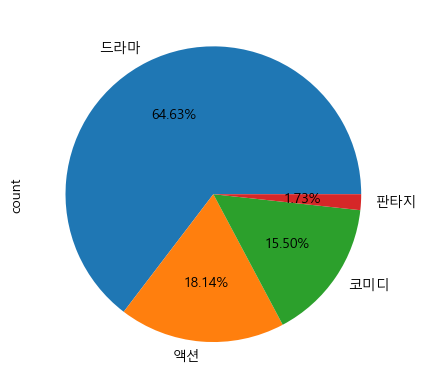

In [94]:
select_genre_data.plot(kind='pie', autopct='%1.2f%%')

#### 5개 장르만 담은 데이터프레임(select_genre_df) 정의, 중복 장르 제거한 목록이 대표 장르(select_genre)와 같은 4개인지 확인

In [95]:
select_genre = ['드라마', '애니메이션', '범죄', '코미디', '스릴러']
select_genre_df = kmdb_df[kmdb_df['대표 장르'].isin(select_genre)]
select_genre_df['대표 장르'].unique()

array(['코미디', '드라마', '애니메이션', '범죄', '스릴러'], dtype=object)

#### 5개 장르만 담은 데이터프레임의 장르가 몇 개인지만 카운트하여 'Series 객체(Grouping_genre_data)'에 저장

In [96]:
Grouping_genre = select_genre_df.groupby('대표 장르')['대표 장르']  # '('대표장르')'로 그룹핑  # 장르에 대해 다른 칼럼도 가져올 수 있음
Grouping_genre_data = Grouping_genre.count().sort_values()  # 값 - '['대표장르']'로 오름차순 정렬
Grouping_genre_data.to_frame()

,대표 장르
대표 장르,
범죄,1523
스릴러,1870
코미디,5277
애니메이션,8638
드라마,22003


<Axes: xlabel='대표 장르'>

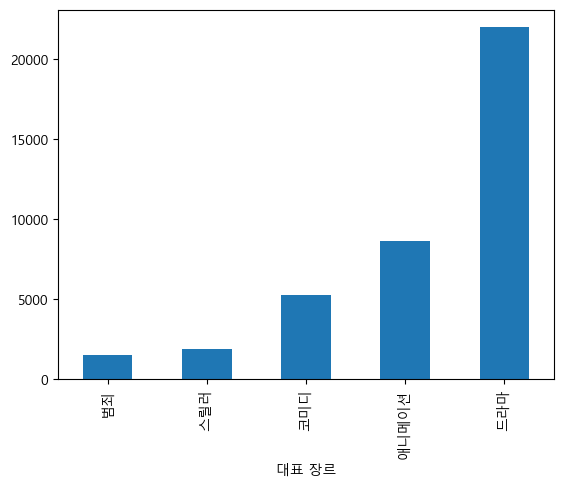

In [97]:
Grouping_genre_data.plot(kind='bar')

In [83]:
select_nation = ['미국', '일본', '중국', '한국']
select_nation_df = kmdb_df[kmdb_df['대표 제작 국가'].isin(select_nation)]
select_nation_df['대표 제작 국가'].unique()

array(['한국', '일본', '미국', '중국'], dtype=object)

In [84]:
Grouping_nation = select_nation_df.groupby('대표 제작 국가')['대표 제작 국가'] 
Grouping_nation_data = Grouping_nation.count().sort_index()  # 인덱스 - '('대표 제작 국가')'로 오름차순 정렬
Grouping_nation_data.to_frame()

,대표 제작 국가
대표 제작 국가,
미국,15761
일본,11963
중국,1951
한국,33049


<Axes: ylabel='대표 제작 국가'>

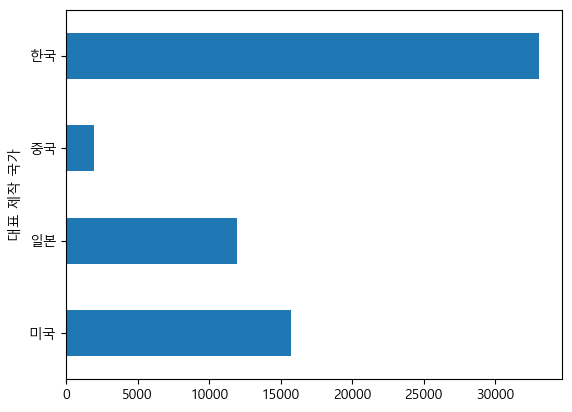

In [85]:
Grouping_nation_data.plot(kind='barh', rot=0)

#### 국가와 장르별 

In [86]:
select_nation = ['한국', '미국', '일본']
select_genre = ['범죄', '코미디', '스릴러', '뮤지컬']

select_data_df = kmdb_df[kmdb_df['대표 제작 국가'].isin(select_nation)]
select_data_df = select_data_df[select_data_df['대표 장르'].isin(select_genre)]

In [103]:
select_data_group = select_data_df.groupby(['대표 제작 국가', '대표 장르'])['대표 제작 국가']
group_data = select_data_group.count().to_frame()
group_data = group_data.rename(columns={'대표 제작 국가':'cnt'})
group_data.reset_index()

,대표 제작 국가,대표 장르,cnt
0,미국,뮤지컬,88
1,미국,범죄,670
2,미국,스릴러,787
3,미국,코미디,2054
4,일본,범죄,64
5,일본,스릴러,79
6,일본,코미디,241
7,한국,뮤지컬,73
8,한국,범죄,205
9,한국,스릴러,422


In [88]:
group_data_22 = pd.pivot_table(group_data, index='대표 제작 국가', columns='대표 장르',values='cnt', aggfunc='mean')
group_data_22

대표 장르,뮤지컬,범죄,스릴러,코미디
대표 제작 국가,,,,
미국,88.0,670.0,787.0,2054.0
일본,NaN,64.0,79.0,241.0
한국,73.0,205.0,422.0,969.0


Text(0.5, 1.0, '국가와 장르별 다변량 수직 막대 그래프')

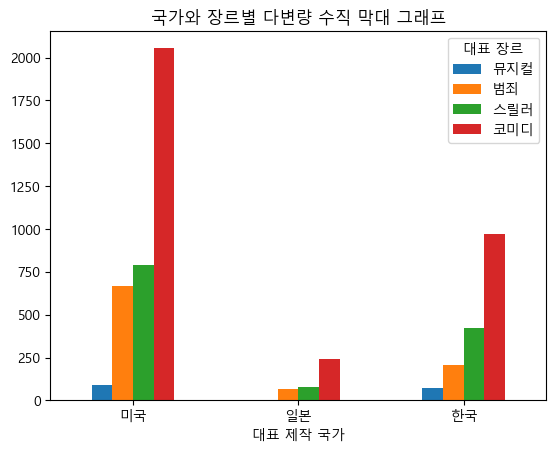

In [89]:
group_data_22.plot(kind='bar', rot=0)
plt.title('국가와 장르별 다변량 수직 막대 그래프')

Text(0.5, 1.0, '국가와 장르별 다변량 수직 막대 그래프')

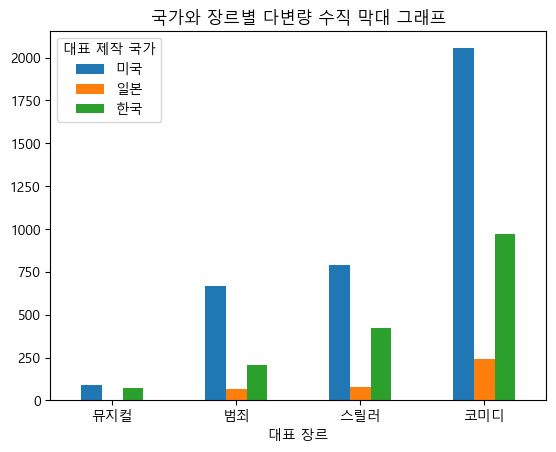

In [90]:
group_data_22.T.plot(kind='bar', rot=0)
plt.title('국가와 장르별 다변량 수직 막대 그래프')